# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
from palmerpenguins import load_penguins
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from plotnine import *


penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [2]:
# Code Here
dummylist = ['species', 'island', 'sex', 'year']
penguins_ = pd.get_dummies(penguins, columns = dummylist)
penguins_

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,year_2007,year_2008,year_2009
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1,1,0,0
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0,1,0,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0,1,0,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0,1,0,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,0,1,0,0,1,0,0,1,0,0,1
340,43.5,18.1,202.0,3400.0,0,1,0,0,1,0,1,0,0,0,1
341,49.6,18.2,193.0,3775.0,0,1,0,0,1,0,0,1,0,0,1
342,50.8,19.0,210.0,4100.0,0,1,0,0,1,0,0,1,0,0,1


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [3]:
#Model 1
y1 = penguins_['bill_depth_mm']
X1 = penguins_[['bill_length_mm', "flipper_length_mm", "body_mass_g"]]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25)

lr = LinearRegression()

Model1 = lr.fit(X_train1, y_train1)
y_pred_lr1 = Model1.predict(X_test1)
mean_squared_error(y_test1, y_pred_lr1)

2.766559856326104

In [4]:
r2_score(y_test1, y_pred_lr1)

0.29248917228312443

In [5]:
#Model 2
y2 = penguins_['bill_depth_mm']
X2 = penguins_[['bill_length_mm', "flipper_length_mm", "body_mass_g", "species_Gentoo",
               "species_Chinstrap"]]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25)

lr = LinearRegression()

Model2 = lr.fit(X_train2, y_train2)
y_pred_lr2 = Model2.predict(X_test2)
mean_squared_error(y_test2, y_pred_lr2)

0.7478568966019074

In [6]:
r2_score(y_test2, y_pred_lr2)

0.8197225958897355

In [7]:
#Model 3
y3 = penguins_['bill_depth_mm']
X3 = penguins_[['bill_length_mm', "flipper_length_mm", "body_mass_g", "species_Gentoo",
               "species_Chinstrap", "sex_male"]]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25)

lr = LinearRegression()

Model3 = lr.fit(X_train3, y_train3)
y_pred_lr3 = Model3.predict(X_test3)
mean_squared_error(y_test3, y_pred_lr3)

0.5857125261780454

In [8]:
r2_score(y_test3, y_pred_lr3)

0.8356182398469343

In [9]:
#Model 4
y4 = penguins_['bill_depth_mm']
X4 = penguins_[['bill_length_mm', "flipper_length_mm", "body_mass_g", "species_Gentoo",
               "species_Chinstrap", "sex_male", "island_Dream", "island_Torgersen"]]

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25)

lr = LinearRegression()

Model4 = lr.fit(X_train4, y_train4)
y_pred_lr4 = Model4.predict(X_test4)
mean_squared_error(y_test4, y_pred_lr4)

0.6585109494024565

In [10]:
r2_score(y_test4, y_pred_lr4)

0.807738723172683

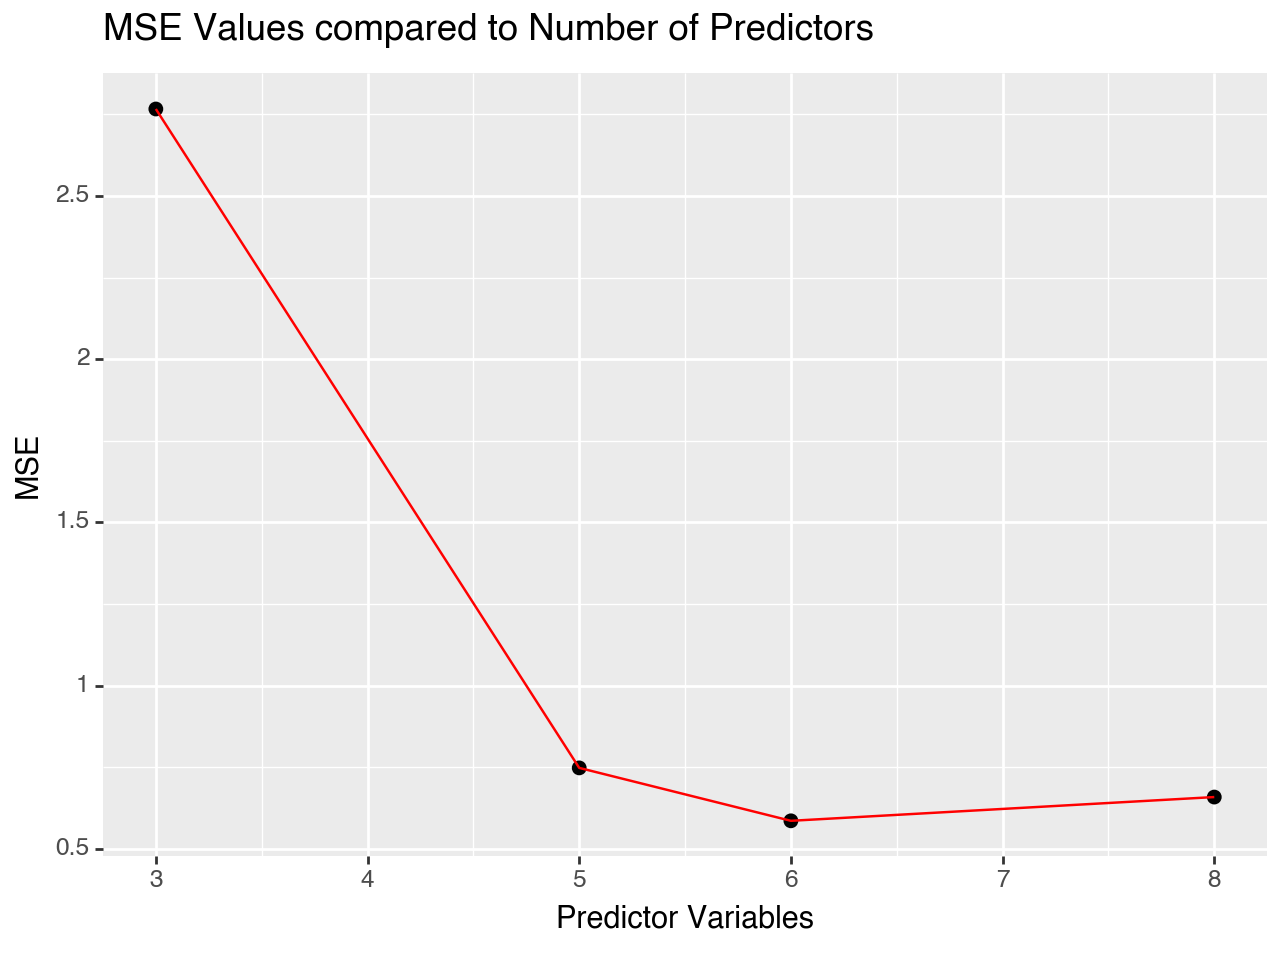

<Figure Size: (640 x 480)>

In [15]:
#Plot
plotdf = pd.DataFrame({ 
    "MSE": [2.766559856326104, 0.7478568966019074, 0.5857125261780454, 0.6585109494024565],
    "Predictor Variables": [3, 5, 6, 8]
})

(ggplot(plotdf, aes(x = "Predictor Variables", y = "MSE"))
  + geom_point(size = 2)
  + geom_line(aes(group = 1), color = "red")
  + labs(title = "MSE Values compared to Number of Predictors"))

Model 3 with 6 predictor variables had the best MSE value and highest R^2. I used MSE to compare since our models have different number of predictor variables and R^2 does not give a penalty for overfitting